<a href="https://colab.research.google.com/github/qwebasilio/CPE019/blob/main/Assignment_8_1_Saving_Models_Basilio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 8.1 | Saving Models
--- | ---
**Name**  |  Basilio, Wilhelm Elian
**Course & Section**  |  CPE 019-CPE32S4
**Date** | April 3, 2024

The Wine Quality dataset contains physicochemical properties of different wine samples, such as acidity, sugar content, and pH, along with their quality ratings (scored from 0 to 10). The problem being addressed is predicting wine quality based on these features. This can be framed as a classification problem (by categorizing wine into quality groups) or a regression problem (by predicting the exact quality score). By building machine learning models, we aim to help wine producers and consumers assess wine quality more efficiently.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt

df = pd.read_csv('/root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1/WineQT.csv')

X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


###HDF5

In [3]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss=tf.keras.losses.mse, metrics=['mae'])
model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

model.save("wine_quality_model.h5")

loaded_model = tf.keras.models.load_model("wine_quality_model.h5")
loss, mae = loaded_model.evaluate(X_test, y_test)
print("Loaded Model MAE:", mae)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5371 - mean_absolute_error: 0.5554  
Loaded Model MAE: 0.5509666800498962


###JSON

In [4]:
model_json = model.to_json()
with open("wine_quality_model.json", "w") as json_file:
    json_file.write(model_json)

with open("wine_quality_model.json", "r") as json_file:
    loaded_json_model = json_file.read()

json_model = model_from_json(loaded_json_model)
json_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
json_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)

loss, mae = json_model.evaluate(X_test, y_test)
print("JSON Loaded Model MAE:", mae)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8056 - mae: 1.0541 
JSON Loaded Model MAE: 1.0253355503082275


###YAML

In [5]:
import yaml

model_json = model.to_json()

model_yaml = yaml.dump(model_json)

with open("wine_quality_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

with open("wine_quality_model.yaml", "r") as yaml_file:
    loaded_yaml_model = yaml.safe_load(yaml_file)

yaml_model = tf.keras.models.model_from_json(loaded_yaml_model)
yaml_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
yaml_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)

loss, mae = yaml_model.evaluate(X_test, y_test)
print("YAML Loaded Model MAE:", mae)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6548 - mae: 1.0247 
YAML Loaded Model MAE: 0.9992786645889282


###Model Checkpoints (Best & Improved Models)

In [6]:
best_checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min")
improved_checkpoint = ModelCheckpoint("improved_model.weights.h5", save_weights_only=True, monitor="val_loss", mode="min")

model.compile(optimizer='adam', loss=tf.keras.losses.mse, metrics=['mae'])
model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0, callbacks=[best_checkpoint, improved_checkpoint])

best_model = tf.keras.models.load_model("best_model.h5")
loss, mae = best_model.evaluate(X_test, y_test)
print("Best Checkpoint Model MAE:", mae)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4676 - mean_absolute_error: 0.4986  
Best Checkpoint Model MAE: 0.4983297884464264


###Visualizing Model Training History

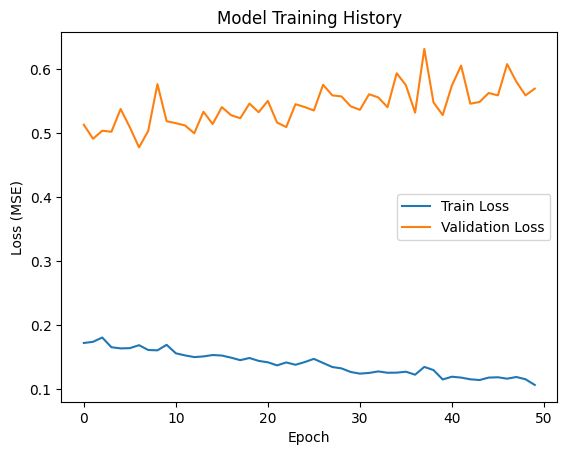

In [7]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Model Training History')
plt.show()

###Dropout Regularization (Visible & Hidden Layers)

In [8]:
dropout_model = Sequential([
    Dropout(0.2, input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

dropout_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
dropout_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

loss, mae = dropout_model.evaluate(X_test, y_test)
print("Dropout Model MAE:", mae)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4686 - mae: 0.5350 
Dropout Model MAE: 0.5247841477394104


###Time-Based Learning Rate Schedule

In [9]:
def time_based_lr(epoch, lr):
    new_lr = lr * 0.98
    print(f"Epoch {epoch+1}: Learning Rate = {new_lr}")
    return new_lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(time_based_lr)

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0, callbacks=[lr_callback])

Epoch 1: Learning Rate = 0.0009800000465475024
Epoch 2: Learning Rate = 0.0009604000113904476
Epoch 3: Learning Rate = 0.0009411920362617821
Epoch 4: Learning Rate = 0.0009223681921139359
Epoch 5: Learning Rate = 0.0009039208351168781
Epoch 6: Learning Rate = 0.0008858424355275929
Epoch 7: Learning Rate = 0.0008681255776900798
Epoch 8: Learning Rate = 0.0008507630741223693
Epoch 9: Learning Rate = 0.0008337477943859994
Epoch 10: Learning Rate = 0.0008170728362165391
Epoch 11: Learning Rate = 0.000800731354393065
Epoch 12: Learning Rate = 0.0007847167318686842
Epoch 13: Learning Rate = 0.0007690224086400121
Epoch 14: Learning Rate = 0.000753641938790679
Epoch 15: Learning Rate = 0.000738569104578346
Epoch 16: Learning Rate = 0.0007237977453041822
Epoch 17: Learning Rate = 0.0007093218143563718
Epoch 18: Learning Rate = 0.0006951353792101144
Epoch 19: Learning Rate = 0.000681232678471133
Epoch 20: Learning Rate = 0.0006676080077886582
Epoch 21: Learning Rate = 0.0006542558339424432
Epoch

###Drop-Based Learning Rate Schedule

In [10]:
def drop_based_lr(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10
    new_lr = lr * (drop_rate ** (epoch // epochs_drop))
    print(f"Epoch {epoch+1}: Learning Rate = {new_lr}")
    return new_lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(drop_based_lr)

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0, callbacks=[lr_callback])

Epoch 1: Learning Rate = 0.0003641696530394256
Epoch 2: Learning Rate = 0.0003641696530394256
Epoch 3: Learning Rate = 0.0003641696530394256
Epoch 4: Learning Rate = 0.0003641696530394256
Epoch 5: Learning Rate = 0.0003641696530394256
Epoch 6: Learning Rate = 0.0003641696530394256
Epoch 7: Learning Rate = 0.0003641696530394256
Epoch 8: Learning Rate = 0.0003641696530394256
Epoch 9: Learning Rate = 0.0003641696530394256
Epoch 10: Learning Rate = 0.0003641696530394256
Epoch 11: Learning Rate = 0.0001820848265197128
Epoch 12: Learning Rate = 9.10424132598564e-05
Epoch 13: Learning Rate = 4.55212066299282e-05
Epoch 14: Learning Rate = 2.27606033149641e-05
Epoch 15: Learning Rate = 1.138030165748205e-05
Epoch 16: Learning Rate = 5.690150828741025e-06
Epoch 17: Learning Rate = 2.8450754143705126e-06
Epoch 18: Learning Rate = 1.4225377071852563e-06
Epoch 19: Learning Rate = 7.112688535926281e-07
Epoch 20: Learning Rate = 3.556344267963141e-07
Epoch 21: Learning Rate = 8.890860669907852e-08
Ep

###Conclusion

Through this experiment, I learned how to save and load neural network models in different formats, apply regularization techniques like dropout, and implement learning rate schedules to improve training efficiency. By using the Wine Quality dataset, I was able to explore both classification and regression tasks, demonstrating how model architecture and hyperparameters affect performance. The results showed that tuning layers, neurons, and learning rates can significantly impact accuracy and loss. Understanding these techniques will help me build more effective deep learning models in the future.